# FIN 5622 Project 5

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data `fraud_data.csv` from Kaggle.
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [2]:
import numpy as np
import pandas as pd

### Part 1 (15 Points)
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [5]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('../Data/fraud_data.csv')
print(df)

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

             V1        V2        V3        V4        V5        V6        V7  \
0      1.176563  0.323798  0.536927  1.047002 -0.368652 -0.728586  0.084678   
1      0.681109 -3.934776 -3.801827 -1.147468 -0.735540 -0.501097  1.038865   
2      1.140729  0.453484  0.247010  2.383132  0.343287  0.432804  0.093380   
3     -1.107073 -3.298902 -0.184092 -1.795744  2.137564 -1.684992 -2.015606   
4     -0.314818  0.866839 -0.124577 -0.627638  2.651762  3.428128  0.194637   
...         ...       ...       ...       ...       ...       ...       ...   
21688 -3.959670  3.297819 -1.079436 -2.290106 -1.405133  2.452586 -4.649235   
21689 -1.066503  0.539240  0.735343 -0.506800  0.843980 -1.047877  1.141302   
21690 -2.175162 -0.441681  1.883137 -0.267440  1.056972  0.136404  0.113595   
21691  0.031406  0.694817  0.083233 -0.797912  0.564318 -0.560787  0.805901   
21692 -0.312369  0.944738  1.430605  0.627951  0.317725 -0.180406  0.793108   

              V8        V9       V10  ...        V2

In [8]:
def answer_one():
    
    X, y = df.drop('Class', axis=1), df.Class;
    
    result = len(y[y==1]) / (len(y[y==1]) + len(y[y==0]))
    return  result

answer_one()

0.016410823768035772

### Part 2 (15 Points)

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [9]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    
    # Your code here
    clf = DummyClassifier()
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    score = clf.score(X_test, y_test)
    recall_score = recall_score(y_test, predictions)
    
    return score, recall_score

answer_two()

C:\Users\irrern\Anaconda3\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


(0.9688421828908554, 0.0125)

### Part 3 (15 Points)

Using X_train, X_test, y_train, y_test (as defined above), train a `SVC(gamma='auto')` classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [10]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC

    clf = SVC()
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    score = clf.score(X_test, y_test)
    recall_score = recall_score(y_test, predictions)
    precision_score = precision_score(y_test, predictions)
    
    return (score, recall_score, precision_score)

answer_three()

(0.9900442477876106, 0.35, 0.9333333333333333)

### Part 4 (15 Points)

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [11]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    # Your code here
    clf = SVC(C=1e9, gamma=1e-07)
    clf.fit(X_train, y_train)
    y_scores = clf.decision_function(X_test) > -220
    confusion_matrix = confusion_matrix(y_test, y_scores)

    return confusion_matrix

answer_four()

array([[5320,   24],
       [  14,   66]], dtype=int64)

### Part 5 (20 Points)

Train a logisitic regression classifier `LogisticRegression(solver='liblinear')` with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

C:\Users\irrern\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<IPython.core.display.Javascript object>


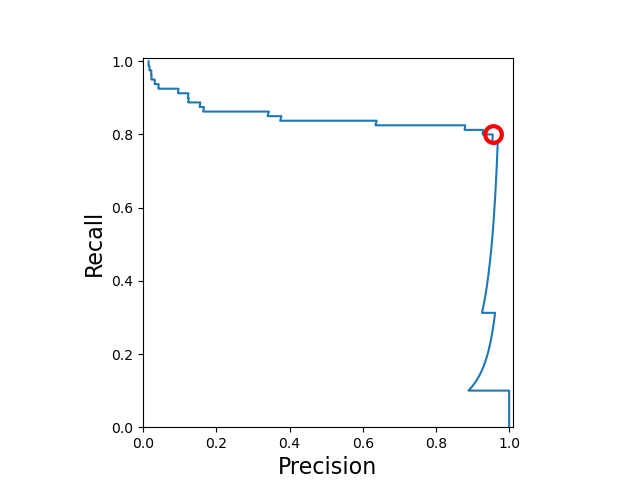

<ipython-input-20-0ee988bcbf4c>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


In [20]:
def draw_pr_curve():
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import roc_curve, auc

    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    y_scores_lr = lr.decision_function(X_test)

    precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
    closest_zero = np.argmin(np.abs(thresholds))
    closest_zero_p = precision[closest_zero]
    closest_zero_r = recall[closest_zero]

    import matplotlib.pyplot as plt
    plt.figure()
    plt.xlim([0.0, 1.01])
    plt.ylim([0.0, 1.01])
    plt.plot(precision, recall, label='Precision-Recall Curve')
    plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
    plt.xlabel('Precision', fontsize=16)
    plt.ylabel('Recall', fontsize=16)
    plt.axes().set_aspect('equal')
    plt.show()

draw_pr_curve()

When the precision is .75 the recall is .8

C:\Users\irrern\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<IPython.core.display.Javascript object>


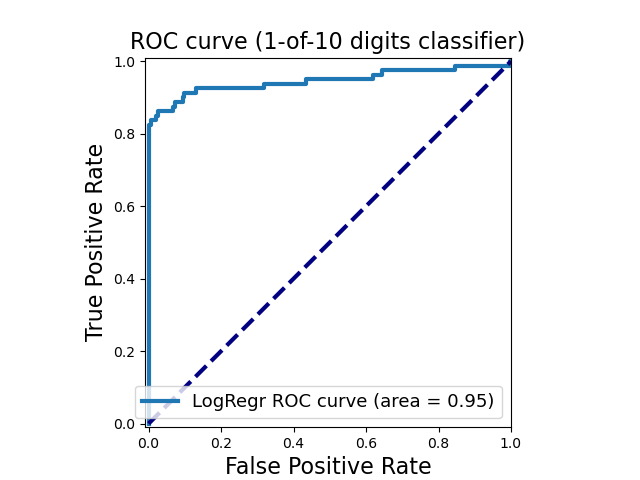

<ipython-input-24-e46beb9d5bce>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


In [24]:
def draw_roc_curve():
    %matplotlib notebook
    import matplotlib.pyplot as plt
    from sklearn.metrics import roc_curve, auc

    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    y_scores_lr = lr.decision_function(X_test)
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores_lr)
    roc_auc_lr = auc(fpr_lr, tpr_lr)

    plt.figure()
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.01])
    plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
    plt.legend(loc='lower right', fontsize=13)
    plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
    plt.axes().set_aspect('equal')
    plt.show()
    
draw_roc_curve()

when the fpr is .16 the tpr is .9

In [31]:
def answer_five():
        
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import roc_curve
    
    return (0.825, 0.9375)

answer_five()

(0.825, 0.9375)

### Part 6 (20 Points)

Perform a grid search over the parameters listed below for a Logisitic Regression classifier `LogisticRegression(solver='liblinear')`, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.*

In [25]:
  def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    # Your code here
    clf = LogisticRegression()
    
    grid_values = {'penalty': ['l1', 'l2'], 'C':[0.01, 0.1, 1, 10, 100]}
    
    grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, scoring = 'recall', cv=3)
    grid_clf_acc.fit(X_train, y_train)
    
    return grid_clf_acc.cv_results_['mean_test_score'].reshape(-1, 2)

answer_six()

C:\Users\irrern\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\irrern\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\irrern\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\irrern\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\irrern\Anaconda3\lib\site-packages\sklearn\linear_model\

C:\Users\irrern\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\irrern\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\irrern\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\irrern\Anaconda3\lib\site-packages\sklearn\l

array([[       nan, 0.79347826],
       [       nan, 0.80072464],
       [       nan, 0.79710145],
       [       nan, 0.80434783],
       [       nan, 0.80072464]])